In [50]:
# from https://github.com/nansencenter/DAPPER/blob/master/tutorials/T6%20-%20Writing%20your%20own%20EnKF.ipynb
# from https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Appendix-E-Ensemble-Kalman-Filters.ipynb
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

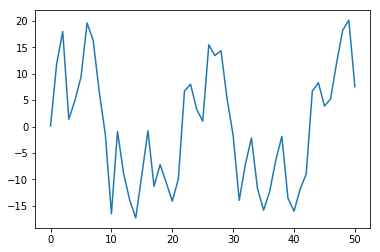

In [51]:
# initial conditions
mu0 = 0
P0 = 2

T = 50 # number of steps
Q = 10 # process noise
R = 1 # measurement noise

# ground truth and measurements
x = np.zeros(T+1)
y = np.zeros(T+1)
x[0] = 0.1
y[0] = 0.05*x[0]**2 + np.random.normal(0, np.sqrt(R))
for k in range(0,T):
    x[k + 1] = 0.5*x[k] + 25*x[k]/(1+x[k]**2) + 8*np.cos(1.2*k) + np.random.normal(0, np.sqrt(Q))
    y[k + 1] = 0.05*x[k+1]**2 + np.random.normal(0, np.sqrt(R))

plt.plot(range(T+1), x)

In [55]:
mu = np.zeros(T+1)

# init ensemble 
N = 100

for k in range(0,T+1):
    sigmas = np.random.normal(x[k], np.sqrt(P[0]), size=N)

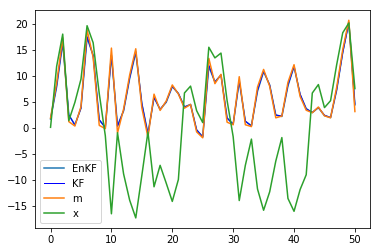

In [54]:
from filterpy.kalman import EnsembleKalmanFilter as EnKF
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import matplotlib.pyplot as plt

np.random.seed(0)

def hx(x):
    return np.array([x[0]])

def fx(x, dt):
    return np.dot(F, x)
    
F = np.array([[1.]])

#x = np.array([0.1])
P = np.eye(1) * 2.
enf = EnKF(x=np.array([0.1]), P=P, dim_z=1, dt=1., N=100, hx=hx, fx=fx)

std_noise = 10.
enf.R *= 1.
enf.Q *= 10.

kf = KalmanFilter(dim_x=1, dim_z=1)
kf.x = np.array([0.1]).T
kf.F = F.copy()
kf.P = P.copy()
kf.R = enf.R.copy()
kf.Q = enf.Q.copy()
kf.H = np.array([[1.]])

measurements = []
results = []
ps = []
kf_results = []

zs = []

'''T = 50
Q = 10
R = 1
# ground truth and measurements
x = np.zeros(T+1)
y = np.zeros(T+1)
x[0] = 0.1
y[0] = 0.05*x[0]**2 + np.random.normal(0, np.sqrt(R))
for k in range(0,T):
    x[k + 1] = 0.5*x[k] + 25*x[k]/(1+x[k]**2) + 8*np.cos(1.2*k) + np.random.normal(0, np.sqrt(Q))
    y[k + 1] = 0.05*x[k+1]**2 + np.random.normal(0, np.sqrt(R))
'''
    
for t in range (0,T+1):
    # create measurement = t plus white noise
    z = 0.05*x[t]**2 + np.random.normal(0, np.sqrt(R))
    zs.append(z)

    enf.predict()
    enf.update(np.asarray([z]))
    
    kf.predict()
    kf.update(np.asarray([[z]]))

    # save data
    results.append (enf.x[0])
    kf_results.append (kf.x[0])
    measurements.append(z)
    ps.append(3*(enf.P[0]**.5))

results = np.asarray(results)
ps = np.asarray(ps)

plt.plot(results, label='EnKF')
plt.plot(kf_results, label='KF', c='b', lw=1)
plt.plot(range(len(measurements)), measurements, label='m')
plt.plot(range(len(x)), x, label='x')
#bp.plot_measurements(measurements)
#plt.plot (results - ps, c='k',linestyle=':', lw=1, label='1$\sigma$')
#plt.plot(results + ps, c='k', linestyle=':', lw=1)
#plt.fill_between(range(100), results - ps, results + ps, facecolor='y', alpha=.3)
plt.legend(loc='best');
plt.show()